In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf

from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('scaled_smoking_drinking_dataset.csv')

In [4]:
df.head()

,age,height,weight,waistline,sight_left,sight_right,SBP,DBP,BLDS,tot_chole,...,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,sex,urine_protein,hear_left,hear_right,DRK_YN,SMK_stat_type_cd
0,-0.889514,0.835874,0.936210,0.739781,0.031629,0.035668,-0.167261,0.399153,-0.058910,-0.066141,...,0.290374,-0.212371,0.351404,0.056791,0,1.0,1.0,1.0,1,0.0
1,-1.242090,1.913117,1.335755,0.655395,-0.133401,0.366370,0.520349,0.601391,0.230586,0.839184,...,0.082270,-0.254936,0.389415,-0.201022,0,1.0,1.0,1.0,0,1.0
2,-0.536938,0.297252,0.936210,0.824167,0.361690,0.862423,-0.167261,-0.612034,-0.100267,-1.540528,...,0.082270,0.894324,0.237373,0.612081,0,1.0,1.0,1.0,0,0.0
3,0.168215,1.374495,1.335755,0.824167,0.856782,0.366370,1.551763,1.106985,-0.224337,0.140790,...,0.498477,0.128151,0.313394,-0.379508,0,1.0,1.0,1.0,0,0.0
4,0.168215,0.297252,-0.262425,-0.104078,0.031629,0.366370,1.070436,0.601391,0.023803,0.089058,...,-0.125833,-0.297501,-0.522835,-0.240685,0,1.0,1.0,1.0,0,0.0


# Multi-label Classification using Feed-Forward

In [5]:
X = df[df.columns[~df.columns.isin(['DRK_YN', 'SMK_stat_type_cd'])]]
y = df[['DRK_YN', 'SMK_stat_type_cd']]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [7]:
X_train_act, X_train_val, y_train_act, y_train_val = train_test_split(X_train, y_train, random_state=17)

In [8]:
X_train.shape

(743509, 22)

In [9]:
def build_ffnn_model():
    ffnn_model = tf.keras.Sequential([
      tf.keras.Input(shape=(X.shape[1],)),
      tf.keras.layers.Dense(22, activation=tf.nn.relu),
      tf.keras.layers.Dense(12, activation=tf.nn.relu),
      tf.keras.layers.Dense(2, activation=tf.nn.sigmoid)
    ])

    return ffnn_model

In [10]:
model = build_ffnn_model()

In [11]:
sgd = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 22)             │           506 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │           276 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 808 (3.16 KB)

 Trainable params: 808 (3.16 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
def run_network(data, model, epochs=20, batch=128):
    X_train, y_train, X_val, y_val = data
    print("Training model")
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch,
                        validation_data=(X_val, y_val), verbose=2)
    return history

In [14]:
history = run_network([X_train_act, y_train_act, X_train_val, y_train_val], model)

Training model
Epoch 1/20
4357/4357 - 2s - 530us/step - accuracy: 0.9434 - loss: 0.4728 - val_accuracy: 0.9416 - val_loss: 0.4619
Epoch 2/20
4357/4357 - 2s - 439us/step - accuracy: 0.9403 - loss: 0.4595 - val_accuracy: 0.9399 - val_loss: 0.4592
Epoch 3/20
4357/4357 - 2s - 479us/step - accuracy: 0.9392 - loss: 0.4574 - val_accuracy: 0.9410 - val_loss: 0.4574
Epoch 4/20
4357/4357 - 2s - 432us/step - accuracy: 0.9391 - loss: 0.4563 - val_accuracy: 0.9378 - val_loss: 0.4563
Epoch 5/20
4357/4357 - 2s - 418us/step - accuracy: 0.9382 - loss: 0.4556 - val_accuracy: 0.9400 - val_loss: 0.4561
Epoch 6/20
4357/4357 - 2s - 416us/step - accuracy: 0.9377 - loss: 0.4551 - val_accuracy: 0.9390 - val_loss: 0.4564
Epoch 7/20
4357/4357 - 2s - 414us/step - accuracy: 0.9373 - loss: 0.4548 - val_accuracy: 0.9398 - val_loss: 0.4552
Epoch 8/20
4357/4357 - 2s - 434us/step - accuracy: 0.9371 - loss: 0.4546 - val_accuracy: 0.9336 - val_loss: 0.4548
Epoch 9/20
4357/4357 - 2s - 416us/step - accuracy: 0.9371 - loss:

In [15]:
def eval_network(data, model, batch=16):
    X_test, y_test = data
    score = model.evaluate(X_test, y_test, batch_size=batch)
    return score

In [16]:
score = eval_network([X_test, y_test], model)

15490/15490 ━━━━━━━━━━━━━━━━━━━━ 4s 260us/step - accuracy: 0.9381 - loss: 0.4534


In [17]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [18]:
y_prob = model.predict(X_test)

7745/7745 ━━━━━━━━━━━━━━━━━━━━ 2s 237us/step


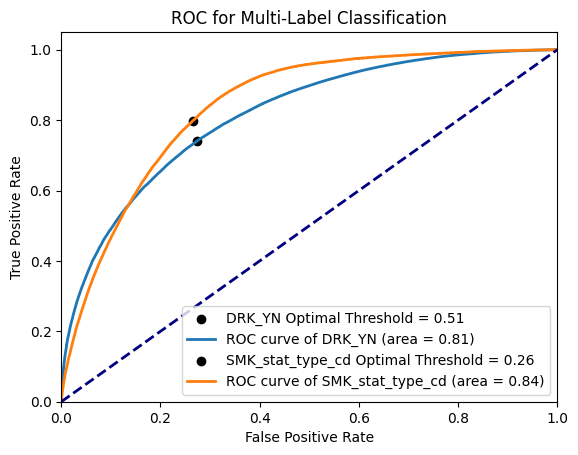

In [19]:
threshold = []
for col,i in zip(['DRK_YN', 'SMK_stat_type_cd'],range(y_prob.shape[1])):  # Assuming y_scores.shape[1] == number of labels
    fpr, tpr, thresholds = roc_curve(y_test[col], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    optimal_idx = np.argmin(np.sqrt((1-tpr)**2 + fpr**2))
    optimal_threshold = thresholds[optimal_idx]
    threshold.append(optimal_threshold)
    plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='black', label='%s Optimal Threshold = %0.2f' % (col, optimal_threshold))
    plt.plot(fpr, tpr, lw=2, label='ROC curve of %s (area = %0.2f)' % (col, roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Multi-Label Classification')
plt.legend(loc="lower right")
plt.show()

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [21]:
y_pred = model.predict(X_test)
y_pred = [[1 if x[0] > threshold[0] else 0, 1 if x[1] > threshold[1] else 0] for x in y_pred]

7745/7745 ━━━━━━━━━━━━━━━━━━━━ 2s 233us/step


In [22]:
ml_acc_drk = accuracy_score(y_test['DRK_YN'], [x[0] for x in y_pred])
ml_acc_drk

0.7335305059373701

In [23]:
precision_drk = precision_score(y_test['DRK_YN'], [x[0] for x in y_pred])
precision_drk

0.7305313824870103

In [24]:
recall_drk = recall_score(y_test['DRK_YN'], [x[0] for x in y_pred])
recall_drk

0.7398887785822094

In [25]:
f1_drk = f1_score(y_test['DRK_YN'], [x[0] for x in y_pred])
f1_drk

0.7351803064387424

In [26]:
roc_auc_drk = roc_auc_score(y_test['DRK_YN'], [x[0] for x in y_prob])
roc_auc_drk

0.8142084853080519

In [27]:
ml_acc_smk = accuracy_score(y_test['SMK_stat_type_cd'], [x[1] for x in y_pred])
ml_acc_smk

0.7487098375141726

In [28]:
precision_smk = precision_score(y_test['SMK_stat_type_cd'], [x[1] for x in y_pred])
precision_smk

0.4536049623996261

In [29]:
recall_smk = recall_score(y_test['SMK_stat_type_cd'], [x[1] for x in y_pred])
recall_smk

0.797601927422819

In [30]:
f1_smk = f1_score(y_test['SMK_stat_type_cd'], [x[1] for x in y_pred])
f1_smk

0.5783155371688187

In [31]:
roc_auc_smk = roc_auc_score(y_test['SMK_stat_type_cd'], [x[1] for x in y_prob])
roc_auc_smk

0.8406606671114565

In [32]:
pd.DataFrame([[ml_acc_drk, precision_drk, recall_drk, f1_drk, roc_auc_drk],
              [ml_acc_smk, precision_smk, recall_smk, f1_smk, roc_auc_smk]],
              index=['Drinker?', 'Smoker?'],
              columns=['accuracy', 'precision', 'recall', 'f1', 'AUC'])

,accuracy,precision,recall,f1,AUC
Drinker?,0.733531,0.730531,0.739889,0.735180,0.814208
Smoker?,0.748710,0.453605,0.797602,0.578316,0.840661


# Single-Label Classification using Feed-Forward

In [33]:
X_smk = df[df.columns[~df.columns.isin(['SMK_stat_type_cd'])]]
y_smk = df['SMK_stat_type_cd']
X_drk = df[df.columns[~df.columns.isin(['DRK_YN'])]]
y_drk = df['DRK_YN']

In [34]:
X_train_smk, X_test_smk, y_train_smk, y_test_smk = train_test_split(X_smk, y_smk, random_state=6)
X_train_act_smk, X_train_val_smk, y_train_act_smk, y_train_val_smk = train_test_split(X_train_smk, y_train_smk, random_state=124)

In [35]:
X_train_drk, X_test_drk, y_train_drk, y_test_drk = train_test_split(X_drk, y_drk, random_state=2)
X_train_act_drk, X_train_val_drk, y_train_act_drk, y_train_val_drk = train_test_split(X_train_drk, y_train_drk, random_state=31)

In [36]:
def build_ff_single_model():
    ffnn_model = tf.keras.Sequential([
      tf.keras.Input(shape=(X_smk.shape[1],)),
      tf.keras.layers.Dense(23, activation=tf.nn.relu),
      tf.keras.layers.Dense(12, activation=tf.nn.relu),
      tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
    ])

    return ffnn_model

### Smoker Classifier

In [37]:
model_smk = build_ff_single_model()

In [38]:
sgd = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model_smk.compile(loss='crossentropy', optimizer=sgd, metrics=['accuracy'])
model_smk.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 23)             │           552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 12)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 853 (3.33 KB)

 Trainable params: 853 (3.33 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
history_smk = run_network([X_train_act_smk, y_train_act_smk, X_train_val_smk, y_train_val_smk], model_smk)

Training model
Epoch 1/20
4357/4357 - 2s - 482us/step - accuracy: 0.8038 - loss: 0.3907 - val_accuracy: 0.8060 - val_loss: 0.3865
Epoch 2/20
4357/4357 - 2s - 409us/step - accuracy: 0.8095 - loss: 0.3817 - val_accuracy: 0.8096 - val_loss: 0.3833
Epoch 3/20
4357/4357 - 2s - 405us/step - accuracy: 0.8103 - loss: 0.3803 - val_accuracy: 0.8108 - val_loss: 0.3827
Epoch 4/20
4357/4357 - 2s - 439us/step - accuracy: 0.8113 - loss: 0.3793 - val_accuracy: 0.8108 - val_loss: 0.3818
Epoch 5/20
4357/4357 - 2s - 410us/step - accuracy: 0.8117 - loss: 0.3788 - val_accuracy: 0.8111 - val_loss: 0.3810
Epoch 6/20
4357/4357 - 2s - 432us/step - accuracy: 0.8121 - loss: 0.3783 - val_accuracy: 0.8111 - val_loss: 0.3810
Epoch 7/20
4357/4357 - 2s - 403us/step - accuracy: 0.8123 - loss: 0.3778 - val_accuracy: 0.8115 - val_loss: 0.3810
Epoch 8/20
4357/4357 - 2s - 445us/step - accuracy: 0.8127 - loss: 0.3776 - val_accuracy: 0.8117 - val_loss: 0.3800
Epoch 9/20
4357/4357 - 2s - 417us/step - accuracy: 0.8126 - loss:

In [40]:
score_smk = eval_network([X_test_smk, y_test_smk], model_smk)

15490/15490 ━━━━━━━━━━━━━━━━━━━━ 5s 304us/step - accuracy: 0.8134 - loss: 0.3774


In [41]:
y_prob = model_smk.predict(X_test_smk)

7745/7745 ━━━━━━━━━━━━━━━━━━━━ 2s 226us/step


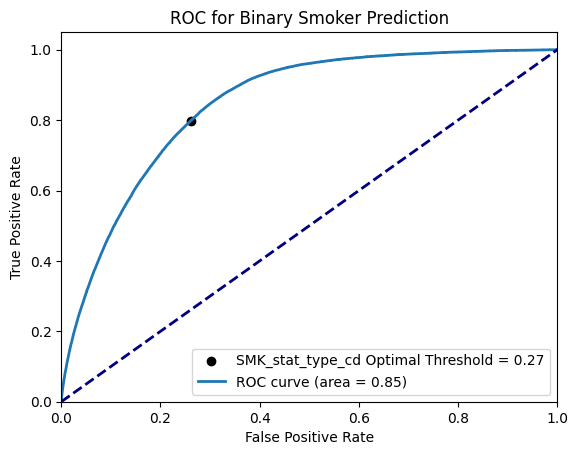

In [42]:
fpr, tpr, thresholds = roc_curve(y_test_smk, y_prob)
roc_auc = auc(fpr, tpr)
optimal_idx = np.argmin(np.sqrt((1-tpr)**2 + fpr**2))
optimal_threshold = thresholds[optimal_idx]
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='black', label='%s Optimal Threshold = %0.2f' % (col, optimal_threshold))
plt.plot(fpr, tpr, lw=2, label='ROC curve (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Binary Smoker Prediction')
plt.legend(loc="lower right")
plt.show()

In [43]:
y_pred = model_smk.predict(X_test_smk)
y_pred = (y_pred > optimal_threshold).astype(int)

   1/7745 ━━━━━━━━━━━━━━━━━━━━ 2:26 19ms/step

7745/7745 ━━━━━━━━━━━━━━━━━━━━ 2s 243us/step


In [44]:
ml_acc_smk = accuracy_score(y_test_smk, y_pred)
ml_acc_smk

0.7518732069868502

In [45]:
precision_smk = precision_score(y_test_smk, y_pred)
precision_smk

0.4565336190731315

In [46]:
recall_smk = recall_score(y_test_smk, y_pred)
recall_smk

0.7981342025401821

In [47]:
f1_smk = f1_score(y_test_smk, y_pred)
f1_smk

0.5808311805162671

In [48]:
roc_auc_smk = roc_auc_score(y_test_smk, y_prob)
roc_auc_smk

0.8450105447847518

### Drinker Classifier

In [49]:
model_drk = build_ff_single_model()

In [50]:
sgd = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model_drk.compile(loss='crossentropy', optimizer=sgd, metrics=['accuracy'])
model_drk.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 23)             │           552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 12)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 853 (3.33 KB)

 Trainable params: 853 (3.33 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
history_drk = run_network([X_train_act_drk, y_train_act_drk, X_train_val_drk, y_train_val_drk], model_drk)

Training model
Epoch 1/20
4357/4357 - 2s - 479us/step - accuracy: 0.7238 - loss: 0.5382 - val_accuracy: 0.7297 - val_loss: 0.5292
Epoch 2/20
4357/4357 - 2s - 407us/step - accuracy: 0.7319 - loss: 0.5260 - val_accuracy: 0.7312 - val_loss: 0.5252
Epoch 3/20
4357/4357 - 2s - 418us/step - accuracy: 0.7331 - loss: 0.5240 - val_accuracy: 0.7318 - val_loss: 0.5258
Epoch 4/20
4357/4357 - 2s - 419us/step - accuracy: 0.7338 - loss: 0.5231 - val_accuracy: 0.7324 - val_loss: 0.5239
Epoch 5/20
4357/4357 - 2s - 463us/step - accuracy: 0.7346 - loss: 0.5222 - val_accuracy: 0.7329 - val_loss: 0.5238
Epoch 6/20
4357/4357 - 2s - 455us/step - accuracy: 0.7349 - loss: 0.5218 - val_accuracy: 0.7343 - val_loss: 0.5224
Epoch 7/20
4357/4357 - 2s - 422us/step - accuracy: 0.7351 - loss: 0.5213 - val_accuracy: 0.7331 - val_loss: 0.5231
Epoch 8/20
4357/4357 - 2s - 427us/step - accuracy: 0.7352 - loss: 0.5208 - val_accuracy: 0.7340 - val_loss: 0.5222
Epoch 9/20
4357/4357 - 2s - 443us/step - accuracy: 0.7354 - loss:

In [52]:
y_prob = model_drk.predict(X_test_drk)

7745/7745 ━━━━━━━━━━━━━━━━━━━━ 2s 259us/step


In [53]:
score_drk = eval_network([X_test_drk, y_test_drk], model_drk)

15490/15490 ━━━━━━━━━━━━━━━━━━━━ 4s 254us/step - accuracy: 0.7354 - loss: 0.5214


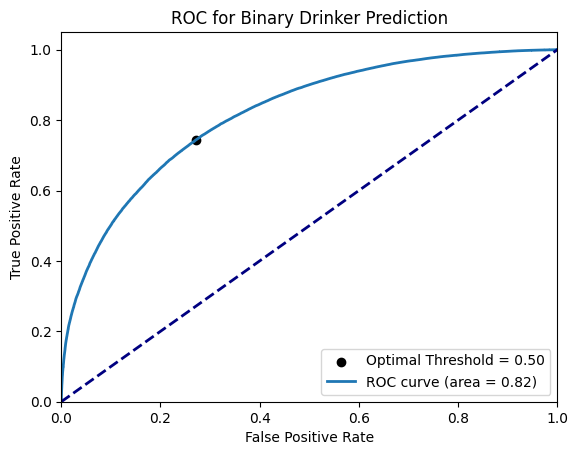

In [54]:
fpr, tpr, thresholds = roc_curve(y_test_drk, y_prob)
roc_auc = auc(fpr, tpr)
optimal_idx = np.argmin(np.sqrt((1-tpr)**2 + fpr**2))
optimal_threshold = thresholds[optimal_idx]
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='black', label='Optimal Threshold = %0.2f' % optimal_threshold)
plt.plot(fpr, tpr, lw=2, label='ROC curve (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Binary Drinker Prediction')
plt.legend(loc="lower right")
plt.show()

In [55]:
y_pred = model_drk.predict(X_test_drk)
y_pred = (y_pred > optimal_threshold).astype(int)

7745/7745 ━━━━━━━━━━━━━━━━━━━━ 2s 215us/step


In [56]:
ml_acc_drk = accuracy_score(y_test_drk, y_pred)
ml_acc_drk

0.736197581474921

In [57]:
precision_drk = precision_score(y_test_drk, y_pred)
precision_drk

0.7328333014841709

In [58]:
recall_drk = recall_score(y_test_drk, y_pred)
recall_drk

0.7430569011173546

In [59]:
f1_drk = f1_score(y_test_drk, y_pred)
f1_drk

0.7379096914886794

In [60]:
roc_auc_drk = roc_auc_score(y_test_drk, y_prob)
roc_auc_drk

0.8180252479202819

In [61]:
pd.DataFrame([[ml_acc_drk, precision_drk, recall_drk, f1_drk, roc_auc_drk],
              [ml_acc_smk, precision_smk, recall_smk, f1_smk, roc_auc_smk]],
              index=['Drinker?', 'Smoker?'],
              columns=['accuracy', 'precision', 'recall', 'f1', 'AUC'])

,accuracy,precision,recall,f1,AUC
Drinker?,0.736198,0.732833,0.743057,0.737910,0.818025
Smoker?,0.751873,0.456534,0.798134,0.580831,0.845011


# Below 50 Multi-Label

In [62]:
below50_df = pd.read_csv('scaled_smoking_drinking_dataset_50_and_under.csv')

In [63]:
X_below = below50_df[below50_df.columns[~below50_df.columns.isin(['DRK_YN', 'SMK_stat_type_cd'])]]
y_below = below50_df[['DRK_YN', 'SMK_stat_type_cd']]

In [64]:
X_train_below, X_test_below, y_train_below, y_test_below = train_test_split(X_below, y_below, random_state=3)

In [65]:
X_train_below_act, X_train_below_val, y_train_below_act, y_train_below_val = train_test_split(X_train_below, y_train_below, random_state=17)

In [66]:
X_train_below.shape

(470130, 22)

In [67]:
model_below = build_ffnn_model()

In [68]:
sgd = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model_below.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [69]:
model_below.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 22)             │           506 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 12)             │           276 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 2)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 808 (3.16 KB)

 Trainable params: 808 (3.16 KB)

 Non-trainable params: 0 (0.00 B)

In [70]:
history = run_network([X_train_below_act, y_train_below_act, X_train_below_val, y_train_below_val], model_below)

Training model
Epoch 1/20
2755/2755 - 1s - 509us/step - accuracy: 0.9393 - loss: 0.5247 - val_accuracy: 0.9406 - val_loss: 0.5077
Epoch 2/20
2755/2755 - 1s - 401us/step - accuracy: 0.9404 - loss: 0.5069 - val_accuracy: 0.9413 - val_loss: 0.5031
Epoch 3/20
2755/2755 - 1s - 409us/step - accuracy: 0.9391 - loss: 0.5033 - val_accuracy: 0.9379 - val_loss: 0.5004
Epoch 4/20
2755/2755 - 1s - 426us/step - accuracy: 0.9375 - loss: 0.5015 - val_accuracy: 0.9370 - val_loss: 0.4995
Epoch 5/20
2755/2755 - 1s - 403us/step - accuracy: 0.9370 - loss: 0.5003 - val_accuracy: 0.9420 - val_loss: 0.4988
Epoch 6/20
2755/2755 - 1s - 402us/step - accuracy: 0.9363 - loss: 0.4996 - val_accuracy: 0.9366 - val_loss: 0.4983
Epoch 7/20
2755/2755 - 1s - 482us/step - accuracy: 0.9357 - loss: 0.4991 - val_accuracy: 0.9395 - val_loss: 0.4986
Epoch 8/20
2755/2755 - 1s - 421us/step - accuracy: 0.9358 - loss: 0.4988 - val_accuracy: 0.9327 - val_loss: 0.4981
Epoch 9/20
2755/2755 - 1s - 405us/step - accuracy: 0.9354 - loss:

In [71]:
score = eval_network([X_test_below, y_test_below], model_below)

9795/9795 ━━━━━━━━━━━━━━━━━━━━ 3s 265us/step - accuracy: 0.9336 - loss: 0.5005


In [72]:
y_prob = model_below.predict(X_test_below)

4898/4898 ━━━━━━━━━━━━━━━━━━━━ 1s 235us/step


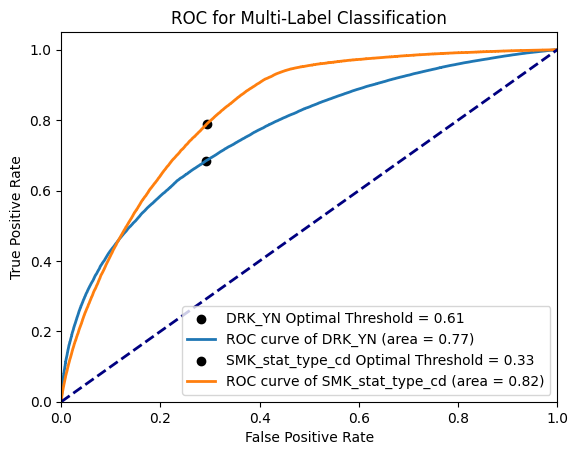

In [73]:
for col,i in zip(['DRK_YN', 'SMK_stat_type_cd'],range(y_prob.shape[1])):  # Assuming y_scores.shape[1] == number of labels
    fpr, tpr, thresholds = roc_curve(y_test_below[col], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    optimal_idx = np.argmin(np.sqrt((1-tpr)**2 + fpr**2))
    optimal_threshold = thresholds[optimal_idx]
    plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='black', label='%s Optimal Threshold = %0.2f' % (col, optimal_threshold))
    plt.plot(fpr, tpr, lw=2, label='ROC curve of %s (area = %0.2f)' % (col, roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Multi-Label Classification')
plt.legend(loc="lower right")
plt.show()

In [74]:
y_pred = model_below.predict(X_test_below)
y_pred = [[1 if x[0] > 0.56 else 0, 1 if x[1] > 0.32 else 0] for x in y_pred]

4898/4898 ━━━━━━━━━━━━━━━━━━━━ 1s 247us/step


In [75]:
ml_acc = accuracy_score(y_test_below['SMK_stat_type_cd'], [x[1] for x in y_pred])
ml_acc

0.7246651479474957

In [76]:
ml_acc = accuracy_score(y_test_below['DRK_YN'], [x[0] for x in y_pred])
ml_acc

0.7010867137597233

# Multiclass Smoker-Drinker

In [77]:
df = pd.read_csv('scaled_smoking_drinking_dataset.csv')

In [78]:
df['Smoker'] = ((df['DRK_YN'] == 0) & (df['SMK_stat_type_cd'] == 1)).astype(int)
df['Drinker'] = ((df['DRK_YN'] == 1) & (df['SMK_stat_type_cd'] == 0)).astype(int)
df['Both'] = ((df['DRK_YN'] == 1) & (df['SMK_stat_type_cd'] == 1)).astype(int)
df['Neither'] = ((df['DRK_YN'] == 0) & (df['SMK_stat_type_cd'] == 0)).astype(int)

In [79]:
df = df.drop(columns=['SMK_stat_type_cd', 'DRK_YN'])

In [80]:
df.head()

,age,height,weight,waistline,sight_left,sight_right,SBP,DBP,BLDS,tot_chole,...,SGOT_ALT,gamma_GTP,sex,urine_protein,hear_left,hear_right,Smoker,Drinker,Both,Neither
0,-0.889514,0.835874,0.936210,0.739781,0.031629,0.035668,-0.167261,0.399153,-0.058910,-0.066141,...,0.351404,0.056791,0,1.0,1.0,1.0,0,1,0,0
1,-1.242090,1.913117,1.335755,0.655395,-0.133401,0.366370,0.520349,0.601391,0.230586,0.839184,...,0.389415,-0.201022,0,1.0,1.0,1.0,1,0,0,0
2,-0.536938,0.297252,0.936210,0.824167,0.361690,0.862423,-0.167261,-0.612034,-0.100267,-1.540528,...,0.237373,0.612081,0,1.0,1.0,1.0,0,0,0,1
3,0.168215,1.374495,1.335755,0.824167,0.856782,0.366370,1.551763,1.106985,-0.224337,0.140790,...,0.313394,-0.379508,0,1.0,1.0,1.0,0,0,0,1
4,0.168215,0.297252,-0.262425,-0.104078,0.031629,0.366370,1.070436,0.601391,0.023803,0.089058,...,-0.522835,-0.240685,0,1.0,1.0,1.0,0,0,0,1


In [81]:
print(np.sum(df['Smoker']))
print(np.sum(df['Drinker']))
print(np.sum(df['Both']))
print(np.sum(df['Neither']))

52377
333911
161577
443481


In [82]:
X = df[df.columns[~df.columns.isin(['Smoker', 'Drinker', 'Both', 'Neither'])]]
y = df[['Smoker', 'Drinker', 'Both', 'Neither']]

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [84]:
X_train_act, X_train_val, y_train_act, y_train_val = train_test_split(X_train, y_train, random_state=17)

In [85]:
X_train.shape

(743509, 22)

In [86]:
def multiclass_nn_model():
    model = tf.keras.Sequential([
      tf.keras.Input(shape=(X.shape[1],)),
      tf.keras.layers.Dense(22, activation=tf.nn.relu),
      tf.keras.layers.Dense(14, activation=tf.nn.relu),
      tf.keras.layers.Dense(8, activation=tf.nn.relu),
      tf.keras.layers.Dense(4, activation=tf.nn.softmax)
    ])
    return model

In [87]:
model_mc = multiclass_nn_model()

In [88]:
sgd = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model_mc.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [89]:
model_mc.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 22)             │           506 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 14)             │           322 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 8)              │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 4)              │            36 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 984 (3.84 KB)

 Trainable params: 984 (3.84 KB)

 Non-trainable params: 0 (0.00 B)

In [90]:
history = run_network([X_train_act, y_train_act, X_train_val, y_train_val], model_mc)

Training model
Epoch 1/20
4357/4357 - 2s - 560us/step - accuracy: 0.5758 - loss: 0.9339 - val_accuracy: 0.5836 - val_loss: 0.9168
Epoch 2/20
4357/4357 - 2s - 419us/step - accuracy: 0.5861 - loss: 0.9136 - val_accuracy: 0.5861 - val_loss: 0.9131
Epoch 3/20
4357/4357 - 2s - 415us/step - accuracy: 0.5888 - loss: 0.9101 - val_accuracy: 0.5896 - val_loss: 0.9107
Epoch 4/20
4357/4357 - 2s - 419us/step - accuracy: 0.5900 - loss: 0.9087 - val_accuracy: 0.5871 - val_loss: 0.9131
Epoch 5/20
4357/4357 - 2s - 430us/step - accuracy: 0.5904 - loss: 0.9076 - val_accuracy: 0.5877 - val_loss: 0.9101
Epoch 6/20
4357/4357 - 2s - 437us/step - accuracy: 0.5912 - loss: 0.9070 - val_accuracy: 0.5900 - val_loss: 0.9076
Epoch 7/20
4357/4357 - 2s - 451us/step - accuracy: 0.5909 - loss: 0.9066 - val_accuracy: 0.5910 - val_loss: 0.9061
Epoch 8/20
4357/4357 - 2s - 425us/step - accuracy: 0.5916 - loss: 0.9058 - val_accuracy: 0.5904 - val_loss: 0.9066
Epoch 9/20
4357/4357 - 2s - 416us/step - accuracy: 0.5916 - loss:

In [91]:
score = eval_network([X_test, y_test], model_mc)

15490/15490 ━━━━━━━━━━━━━━━━━━━━ 4s 260us/step - accuracy: 0.5906 - loss: 0.9052


In [92]:
probs = model_mc.predict(X_test)

7745/7745 ━━━━━━━━━━━━━━━━━━━━ 2s 235us/step


In [93]:
preds = np.zeros_like(probs)

In [94]:
max_indices = np.argmax(probs, axis=1)

In [95]:
preds[np.arange(probs.shape[0]), max_indices] = 1

In [96]:
preds

array([[0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [97]:
accuracy_score(y_test, preds)

0.5901378728761242

In [98]:
ml_acc = accuracy_score(y_test, preds)
ml_acc

0.5901378728761242

In [100]:
precision = precision_score(y_test, preds, average='weighted')
precision

0.5768220670343079

In [101]:
recall = recall_score(y_test, preds, average='weighted')
recall

0.5901378728761242

In [102]:
f1 = f1_score(y_test, preds, average='weighted')
f1

0.5771865659688203

In [103]:
roc_auc = roc_auc_score(y_test, probs)
roc_auc

0.7971461463018986

In [105]:
pd.DataFrame([[ml_acc, precision, recall, f1, roc_auc]],
             index=['Multi-class'],
              columns=['accuracy', 'precision', 'recall', 'f1', 'AUC'])

,accuracy,precision,recall,f1,AUC
Multi-class,0.590138,0.576822,0.590138,0.577187,0.797146
